In [1]:
#Melihat dataset bawaan atau default dari scikit-learn
datasets.load_*?

## Dataset gaji-karyawan
### Import numpy, pandas, matplotlib, dan scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## Pendefinisian Masalah Gaji
Bagaimana menentukan berapa gaji terbaik yang harus diberikan kepada kandidat karyawan baru yang memiliki pengalaman bekerja selama 10 tahun?

## Persiapan Data Gaji

In [3]:
# y = gaji (yang akan dicari berdasarkan)
# x = pengalaman bekerja ()
df_gaji = pd.read_csv("salary_data.csv")
df_gaji.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


### Melihat shape dataset

In [4]:
df_gaji.shape #(melihat jumlah baris dan kolom)

(30, 2)

### Melihat 5 baris teratas

In [5]:
df_gaji.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


### Memperoleh deskripsi singkat dari dataset

In [6]:
df_gaji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


#### Melihat summary statistik

In [7]:
df_gaji.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


## Melatih Model, dijabarkan menjadi 2 bagian:
### Traning

In [8]:
x = df_gaji.iloc[:, :-1] # x berisi kolom YearExperience
y = df_gaji.iloc[:, 1:] # y berisi kolom Salary

In [9]:
x.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


Text(0, 0.5, 'Salary')

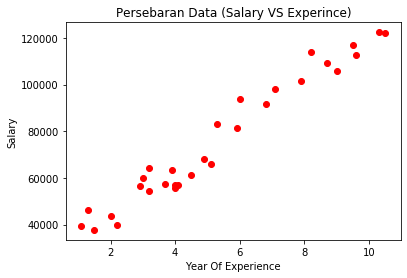

In [10]:
plt.scatter(x,y, color='r')
plt.title('Persebaran Data (Salary VS Experince)')
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')

In [11]:
# import train_test_split dari sklearn.model_selection
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

In [12]:
x_train.head()

,YearsExperience
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2


In [13]:
#import LinierRegresion dari sklear.linear_model
from sklearn.linear_model import LinearRegression

#masukkan fungsi LinearRegresion kedalam variabel regressor
regressor = LinearRegression()

#gunakan training data untuk membuat model
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict

In [14]:
#Prediksi berdasarkan x_test
y_pred = regressor.predict(x_test)

#Membuat dataframe untuk y_test dan y_pred
df1 = pd.DataFrame(y_test).reset_index(drop = True)
df2 = pd.DataFrame(y_pred, columns=['Perdicted Salary']).reset_index(drop=True)

df1.join(df2)

,Salary,Perdicted Salary
0,37731,40835.105909
1,122391,123079.399408
2,57081,65134.556261
3,63218,63265.367772
4,116969,115602.645454
5,109431,108125.891499
6,112635,116537.239698
7,55794,64199.962017
8,83088,76349.687193
9,101302,100649.137545


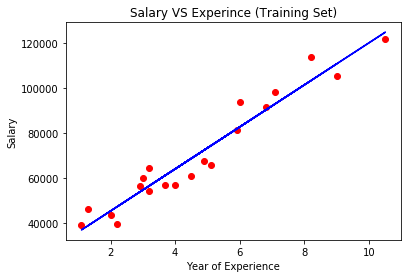

In [15]:
#Hasil Visualisasi Training Data
plt.scatter(x_train, y_train, color='r')
plt.plot(x_train, regressor.predict(x_train), color='b')
plt.title('Salary VS Experince (Training Set)')
plt.xlabel('Year of Experience')
plt.ylabel('Salary')
plt.show()

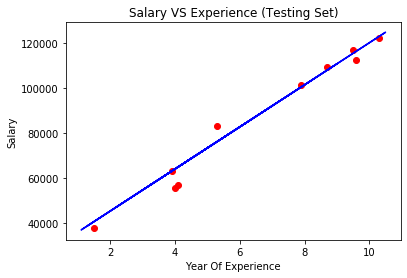

In [16]:
#Hasil Visualisasi Menggunakan Testing Data
plt.scatter(x_test, y_test, color='r')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary VS Experience (Testing Set)')
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

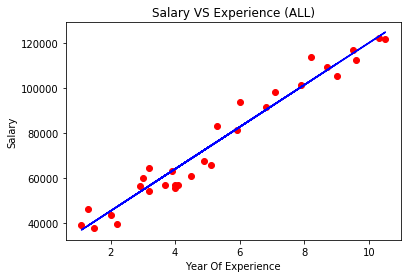

In [17]:
#Hasil Visualisasi Menggunakan Data Asli
plt.scatter(x, y, color='r')
plt.plot(x_train, regressor.predict(x_train), color='b')
plt.title('Salary VS Experience (ALL)')
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

In [18]:
#Prediksi kandidat karyawan baru yang memiliki 10 penganlaman kerja
y_pred = regressor.predict([[10]])

print('Gaji Tertinggi yang bisa diberikan adalah $', int(y_pred))

Gaji Tertinggi yang bisa diberikan adalah $ 120275


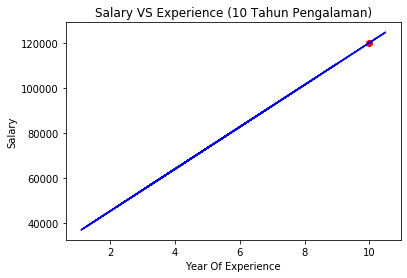

In [19]:
#Visualisasi Gaji dengan Pengalaman 10 Tahun
plt.scatter(10, y_pred, color='r')
plt.plot(x_train, regressor.predict(x_train), color='b')
plt.title('Salary VS Experience (10 Tahun Pengalaman)')
plt.xlabel('Year Of Experience')
plt.ylabel('Salary')
plt.show()

## Menguji Akurasi Model Gaji

In [20]:
#Menguji akurasi model
#masukkan model yang menggunakan traning data kedalam variabel
model = regressor.fit(x_train, y_train)

#tampilkan nilai score dari model yang menggunakan test data
print('Score dari model adalah ', model.score(x_test, y_test))

Score dari model adalah  0.9749154407708353
